Plot the grillmair styx track with my simulated stream particles, to compare the model trajectory with the data

In [2]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics
import pandas as pd

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [3]:
styx_radec = pd.read_csv(r"styx_radec.csv")
styx_trace = pd.read_csv(r"styx_trace.csv")

In [4]:
styx_ra = styx_radec.ra.to_list()
styx_dec = styx_radec.dec.to_list()

styx_tra = styx_trace.ra.to_list()
styx_tdec = styx_trace.dec.to_list()

In [9]:
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)
tdisrupt=5

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

pot14 = graphics.lmc_potential_wacc(tdisrupt, pot=MWPotential2014)

In [13]:
# Integrate orbit of Boo3
ts = np.linspace(0,-(tdisrupt/3)/to,1000)
o.integrate(ts, pot=pot14)

In [14]:
import pickle
filehandler = open('lmc_stream_models.obj', 'rb') 
obj = pickle.load(filehandler)

oall_lmc = obj.get("MW14 1E7")
oall_lmc2 = obj.get("MW14 5*1E7")
oall_lmc3 = obj.get("MW14 1E8")
oall_lmc4 = obj.get("MW14 2.5*1E6")
oall_lmc17 = obj.get("MCM17 1E7")
oall_lmc172 = obj.get("MCM17 5*1E7")
oall_lmc173 = obj.get("MCM17 2.5*1E6")

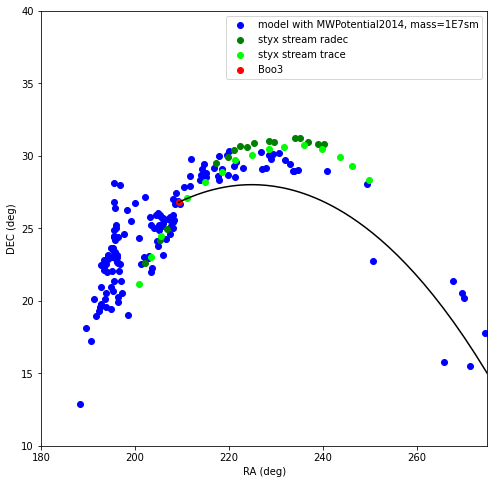

In [15]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc.ra(), oall_lmc.dec(), label='model with MWPotential2014, mass=1E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

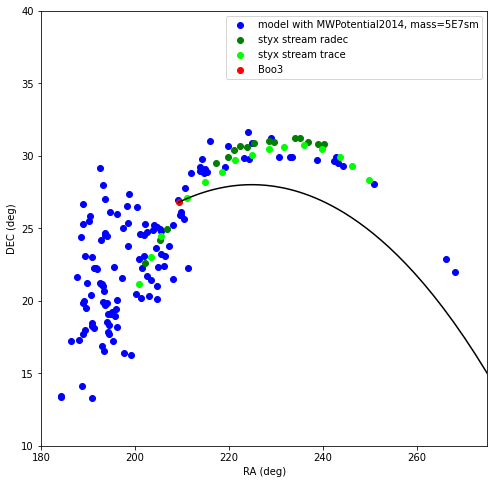

In [16]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc2.ra(), oall_lmc2.dec(), label='model with MWPotential2014, mass=5E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

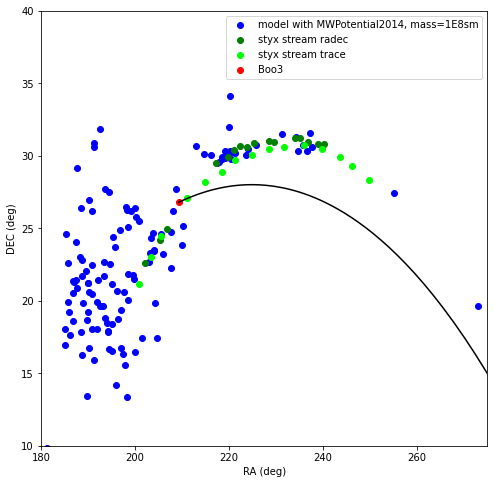

In [17]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc3.ra(), oall_lmc3.dec(), label='model with MWPotential2014, mass=1E8sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

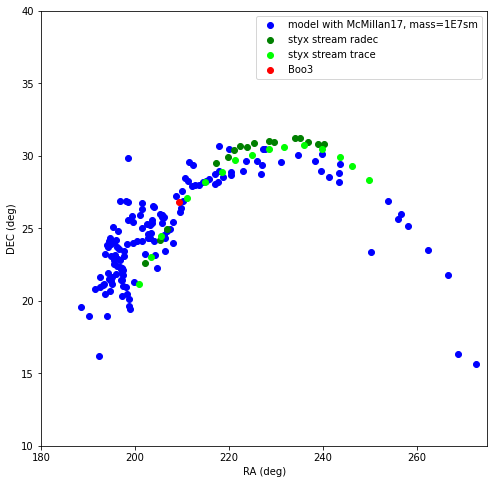

In [42]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc17.ra(), oall_lmc17.dec(), label='model with McMillan17, mass=1E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

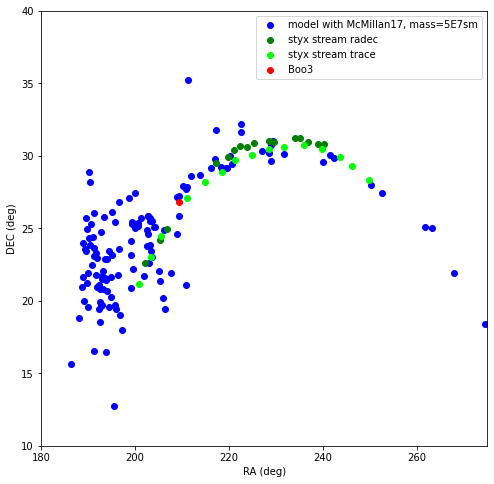

In [43]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc172.ra(), oall_lmc172.dec(), label='model with McMillan17, mass=5E7sm', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()